In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean,col,split, col, regexp_extract,udf, when, lit,length,isnan, count

In [0]:
spark =SparkSession.builder.master("local[*]") \
                    .appName('PokemonEDA') \
                    .config('spark.sql.repl.eagerEval.enabled', True) \
                    .getOrCreate()

In [0]:
df = spark.read.csv('/FileStore/tables/creditcard.csv',header=True,inferSchema=True)

In [0]:
display(df)

Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class 0.0 -1.3598071336738 -0.0727811733098497 2.53634673796914 1.37815522427443 -0.338320769942518 0.462387777762292 0.239598554061257 0.0986979012610507 0.363786969611213 0.0907941719789316 -0.551599533260813 -0.617800855762348 -0.991389847235408 -0.311169353699879 1.46817697209427 -0.470400525259478 0.207971241929242 0.0257905801985591 0.403992960255733 0.251412098239705 -0.018306777944153 0.277837575558899 -0.110473910188767 0.0669280749146731 0.128539358273528 -0.189114843888824 0.133558376740387 -0.0210530534538215 149.62 0 0.0 1.19185711131486 0.26615071205963 0.16648011335321 0.448154078460911 0.0600176492822243 -0.0823608088155687 -0.0788029833323113 0.0851016549148104 -0.255425128109186 -0.166974414004614 1.61272666105479 1.06523531137287 0.48909501589608 -0.143772296441519 0.635558093258208 0.463917041022171 -0.114804663102346 -0.183361270123994 -0.145783041325259 -0.0690831352230203 -0.225775248033138 -0.638671952771851 0.101288021253234 -0.339846475529127 0.167170404418143 0.125894532368176 -0.00898309914322813 0.0147241691924927 2.69 0 1.0 -1.35835406159823 -1.34016307473609 1.77320934263119 0.379779593034328 -0.503198133318193 1.80049938079263 0.791460956450422 0.247675786588991 -1.51465432260583 0.207642865216696 0.624501459424895 0.066083685268831 0.717292731410831 -0.165945922763554 2.34586494901581 -2.89008319444231 1.10996937869599 -0.121359313195888 -2.26185709530414 0.524979725224404 0.247998153469754 0.771679401917229 0.909412262347719 -0.689280956490685 -0.327641833735251 -0.139096571514147 -0.0553527940384261 -0.0597518405929204 378.66 0 1.0 -0.966271711572087 -0.185226008082898 1.79299333957872 -0.863291275036453 -0.0103088796030823 1.24720316752486 0.23760893977178 0.377435874652262 -1.38702406270197 -0.0549519224713749 -0.226487263835401 0.178228225877303 0.507756869957169 -0.28792374549456 -0.631418117709045 -1.0596472454325 -0.684092786345479 1.96577500349538 -1.2326219700892 -0.208037781160366 -0.108300452035545 0.00527359678253453 -0.190320518742841 -1.17557533186321 0.647376034602038 -0.221928844458407 0.0627228487293033 0.0614576285006353 123.5 0 2.0 -1.15823309349523 0.877736754848451 1.548717846511 0.403033933955121 -0.407193377311653 0.0959214624684256 0.592940745385545 -0.270532677192282 0.817739308235294 0.753074431976354 -0.822842877946363 0.53819555014995 1.3458515932154 -1.11966983471731 0.175121130008994 -0.451449182813529 -0.237033239362776 -0.0381947870352842 0.803486924960175 0.408542360392758 -0.00943069713232919 0.79827849458971 -0.137458079619063 0.141266983824769 -0.206009587619756 0.502292224181569 0.219422229513348 0.215153147499206 69.99 0 2.0 -0.425965884412454 0.960523044882985 1.14110934232219 -0.168252079760302 0.42098688077219 -0.0297275516639742 0.476200948720027 0.260314333074874 -0.56867137571251 -0.371407196834471 1.34126198001957 0.359893837038039 -0.358090652573631 -0.137133700217612 0.517616806555742 0.401725895589603 -0.0581328233640131 0.0686531494425432 -0.0331937877876282 0.0849676720682049 -0.208253514656728 -0.559824796253248 -0.0263976679795373 -0.371426583174346 -0.232793816737034 0.105914779097957 0.253844224739337 0.0810802569229443 3.67 0 4.0 1.22965763450793 0.141003507049326 0.0453707735899449 1.20261273673594 0.191880988597645 0.272708122899098 -0.00515900288250983 0.0812129398830894 0.464959994783886 -0.0992543211289237 -1.41690724314928 -0.153825826253651 -0.75106271556262 0.16737196252175 0.0501435942254188 -0.443586797916727 0.00282051247234708 -0.61198733994012 -0.0455750446637976 -0.21963255278686 -0.167716265815783 -0.270709726172363 -0.154103786809305 -0.780055415004671 0.75013693580659 -0.257236845917139 0.0345074297438413 0.00516776890624916 4.99 0 7.0 -0.644269442348146 1.41796354547385 1.0743803763556 -0.492199018495015 0.948934094764157 0.428118462833089 1.12063135838353 -3.80786423873589 0.615374730667027 1.24937617815176 

In [0]:
df.printSchema()

root
-- Time: double (nullable = true)
-- V1: double (nullable = true)
-- V2: double (nullable = true)
-- V3: double (nullable = true)
-- V4: double (nullable = true)
-- V5: double (nullable = true)
-- V6: double (nullable = true)
-- V7: double (nullable = true)
-- V8: double (nullable = true)
-- V9: double (nullable = true)
-- V10: double (nullable = true)
-- V11: double (nullable = true)
-- V12: double (nullable = true)
-- V13: double (nullable = true)
-- V14: double (nullable = true)
-- V15: double (nullable = true)
-- V16: double (nullable = true)
-- V17: double (nullable = true)
-- V18: double (nullable = true)
-- V19: double (nullable = true)
-- V20: double (nullable = true)
-- V21: double (nullable = true)
-- V22: double (nullable = true)
-- V23: double (nullable = true)
-- V24: double (nullable = true)
-- V25: double (nullable = true)
-- V26: double (nullable = true)
-- V27: double (nullable = true)
-- V28: double (nullable = true)
-- Amount: double (nullable = true)
-- Class: integer (nullable = true)

In [0]:
#DataFrame Dimenstions and Shape
print((df.count(), len(df.columns)))

(284807, 31)

In [0]:
print(df.columns,sep=' ')

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

In [0]:
display(df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]))

Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [0]:
df.select('Amount').summary().show()

+-------+------------------+
summary| Amount|
+-------+------------------+
 count| 284807|
 mean| 88.34961925093698|
 stddev|250.12010924018836|
 min| 0.0|
 25%| 5.58|
 50%| 22.0|
 75%| 77.1|
 max| 25691.16|
+-------+------------------+

In [0]:
#Let’s check the number of occurrences of each class label and plot the information using matplotlib
#non_fraud = df.filter((df.Class == 0) & (df.Amount > 20000)) Multiple Condition Check using PySpark
non_fraud = df.filter(df.Class == 0)
fraud = df.filter(df.Class == 1)
print("Number of Genuine transactions: ", non_fraud.count())
print("Number of Fraud transactions: ", fraud.count())

Number of Genuine transactions: 284315
Number of Fraud transactions: 492

In [0]:
non_fraud.count()/df.count()

Out[213]: 0.9982725143693799

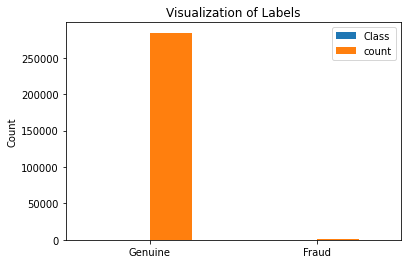

In [0]:
#MatplotLib in PySpark
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = df.groupBy('Class').count().sort('Class')
count_classes.toPandas().plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [0]:
#Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.
#First Step in PySpark is Make Vector of the Values in Amount Column
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=["Amount"], outputCol="Amount_Vect")
output = assembler.transform(df)
display(output)

Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class Amount_Vect 0.0 -1.3598071336738 -0.0727811733098497 2.53634673796914 1.37815522427443 -0.338320769942518 0.462387777762292 0.239598554061257 0.0986979012610507 0.363786969611213 0.0907941719789316 -0.551599533260813 -0.617800855762348 -0.991389847235408 -0.311169353699879 1.46817697209427 -0.470400525259478 0.207971241929242 0.0257905801985591 0.403992960255733 0.251412098239705 -0.018306777944153 0.277837575558899 -0.110473910188767 0.0669280749146731 0.128539358273528 -0.189114843888824 0.133558376740387 -0.0210530534538215 149.62 0 Map(vectorType -> dense, length -> 1, values -> List(149.62)) 0.0 1.19185711131486 0.26615071205963 0.16648011335321 0.448154078460911 0.0600176492822243 -0.0823608088155687 -0.0788029833323113 0.0851016549148104 -0.255425128109186 -0.166974414004614 1.61272666105479 1.06523531137287 0.48909501589608 -0.143772296441519 0.635558093258208 0.463917041022171 -0.114804663102346 -0.183361270123994 -0.145783041325259 -0.0690831352230203 -0.225775248033138 -0.638671952771851 0.101288021253234 -0.339846475529127 0.167170404418143 0.125894532368176 -0.00898309914322813 0.0147241691924927 2.69 0 Map(vectorType -> dense, length -> 1, values -> List(2.69)) 1.0 -1.35835406159823 -1.34016307473609 1.77320934263119 0.379779593034328 -0.503198133318193 1.80049938079263 0.791460956450422 0.247675786588991 -1.51465432260583 0.207642865216696 0.624501459424895 0.066083685268831 0.717292731410831 -0.165945922763554 2.34586494901581 -2.89008319444231 1.10996937869599 -0.121359313195888 -2.26185709530414 0.524979725224404 0.247998153469754 0.771679401917229 0.909412262347719 -0.689280956490685 -0.327641833735251 -0.139096571514147 -0.0553527940384261 -0.0597518405929204 378.66 0 Map(vectorType -> dense, length -> 1, values -> List(378.66)) 1.0 -0.966271711572087 -0.185226008082898 1.79299333957872 -0.863291275036453 -0.0103088796030823 1.24720316752486 0.23760893977178 0.377435874652262 -1.38702406270197 -0.0549519224713749 -0.226487263835401 0.178228225877303 0.507756869957169 -0.28792374549456 -0.631418117709045 -1.0596472454325 -0.684092786345479 1.96577500349538 -1.2326219700892 -0.208037781160366 -0.108300452035545 0.00527359678253453 -0.190320518742841 -1.17557533186321 0.647376034602038 -0.221928844458407 0.0627228487293033 0.0614576285006353 123.5 0 Map(vectorType -> dense, length -> 1, values -> List(123.5)) 2.0 -1.15823309349523 0.877736754848451 1.548717846511 0.403033933955121 -0.407193377311653 0.0959214624684256 0.592940745385545 -0.270532677192282 0.817739308235294 0.753074431976354 -0.822842877946363 0.53819555014995 1.3458515932154 -1.11966983471731 0.175121130008994 -0.451449182813529 -0.237033239362776 -0.0381947870352842 0.803486924960175 0.408542360392758 -0.00943069713232919 0.79827849458971 -0.137458079619063 0.141266983824769 -0.206009587619756 0.502292224181569 0.219422229513348 0.215153147499206 69.99 0 Map(vectorType -> dense, length -> 1, values -> List(69.99)) 2.0 -0.425965884412454 0.960523044882985 1.14110934232219 -0.168252079760302 0.42098688077219 -0.0297275516639742 0.476200948720027 0.260314333074874 -0.56867137571251 -0.371407196834471 1.34126198001957 0.359893837038039 -0.358090652573631 -0.137133700217612 0.517616806555742 0.401725895589603 -0.0581328233640131 0.0686531494425432 -0.0331937877876282 0.0849676720682049 -0.208253514656728 -0.559824796253248 -0.0263976679795373 -0.371426583174346 -0.232793816737034 0.105914779097957 0.253844224739337 0.0810802569229443 3.67 0 Map(vectorType -> dense, length -> 1, values -> List(3.67)) 4.0 1.22965763450793 0.141003507049326 0.0453707735899449 1.20261273673594 0.191880988597645 0.272708122899098 -0.00515900288250983 0.0812129398830894 0.464959994783886 -0.0992543211289237 -1.41690724314928 -0.153825826253651 -0.75106271556262 0.16737196252175 0.0501435942254188 -0.443586797916727 0.00282051247234708 -0.61198733994012

In [0]:
#Then Apply Scaling on it
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="Amount_Vect", outputCol="SAmount",
                        withStd=True, withMean=False)

final_df = scaler.fit(output).transform(output)
display(final_df)

Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount Class Amount_Vect SAmount 0.0 -1.3598071336738 -0.0727811733098497 2.53634673796914 1.37815522427443 -0.338320769942518 0.462387777762292 0.239598554061257 0.0986979012610507 0.363786969611213 0.0907941719789316 -0.551599533260813 -0.617800855762348 -0.991389847235408 -0.311169353699879 1.46817697209427 -0.470400525259478 0.207971241929242 0.0257905801985591 0.403992960255733 0.251412098239705 -0.018306777944153 0.277837575558899 -0.110473910188767 0.0669280749146731 0.128539358273528 -0.189114843888824 0.133558376740387 -0.0210530534538215 149.62 0 Map(vectorType -> dense, length -> 1, values -> List(149.62)) Map(vectorType -> dense, length -> 1, values -> List(0.5981926061623504)) 0.0 1.19185711131486 0.26615071205963 0.16648011335321 0.448154078460911 0.0600176492822243 -0.0823608088155687 -0.0788029833323113 0.0851016549148104 -0.255425128109186 -0.166974414004614 1.61272666105479 1.06523531137287 0.48909501589608 -0.143772296441519 0.635558093258208 0.463917041022171 -0.114804663102346 -0.183361270123994 -0.145783041325259 -0.0690831352230203 -0.225775248033138 -0.638671952771851 0.101288021253234 -0.339846475529127 0.167170404418143 0.125894532368176 -0.00898309914322813 0.0147241691924927 2.69 0 Map(vectorType -> dense, length -> 1, values -> List(2.69)) Map(vectorType -> dense, length -> 1, values -> List(0.010754832980729332)) 1.0 -1.35835406159823 -1.34016307473609 1.77320934263119 0.379779593034328 -0.503198133318193 1.80049938079263 0.791460956450422 0.247675786588991 -1.51465432260583 0.207642865216696 0.624501459424895 0.066083685268831 0.717292731410831 -0.165945922763554 2.34586494901581 -2.89008319444231 1.10996937869599 -0.121359313195888 -2.26185709530414 0.524979725224404 0.247998153469754 0.771679401917229 0.909412262347719 -0.689280956490685 -0.327641833735251 -0.139096571514147 -0.0553527940384261 -0.0597518405929204 378.66 0 Map(vectorType -> dense, length -> 1, values -> List(378.66)) Map(vectorType -> dense, length -> 1, values -> List(1.5139126604025908)) 1.0 -0.966271711572087 -0.185226008082898 1.79299333957872 -0.863291275036453 -0.0103088796030823 1.24720316752486 0.23760893977178 0.377435874652262 -1.38702406270197 -0.0549519224713749 -0.226487263835401 0.178228225877303 0.507756869957169 -0.28792374549456 -0.631418117709045 -1.0596472454325 -0.684092786345479 1.96577500349538 -1.2326219700892 -0.208037781160366 -0.108300452035545 0.00527359678253453 -0.190320518742841 -1.17557533186321 0.647376034602038 -0.221928844458407 0.0627228487293033 0.0614576285006353 123.5 0 Map(vectorType -> dense, length -> 1, values -> List(123.5)) Map(vectorType -> dense, length -> 1, values -> List(0.4937627781115511)) 2.0 -1.15823309349523 0.877736754848451 1.548717846511 0.403033933955121 -0.407193377311653 0.0959214624684256 0.592940745385545 -0.270532677192282 0.817739308235294 0.753074431976354 -0.822842877946363 0.53819555014995 1.3458515932154 -1.11966983471731 0.175121130008994 -0.451449182813529 -0.237033239362776 -0.0381947870352842 0.803486924960175 0.408542360392758 -0.00943069713232919 0.79827849458971 -0.137458079619063 0.141266983824769 -0.206009587619756 0.502292224181569 0.219422229513348 0.215153147499206 69.99 0 Map(vectorType -> dense, length -> 1, values -> List(69.99)) Map(vectorType -> dense, length -> 1, values -> List(0.2798255614577122)) 2.0 -0.425965884412454 0.960523044882985 1.14110934232219 -0.168252079760302 0.42098688077219 -0.0297275516639742 0.476200948720027 0.260314333074874 -0.56867137571251 -0.371407196834471 1.34126198001957 0.359893837038039 -0.358090652573631 -0.137133700217612 0.517616806555742 0.401725895589603 -0.0581328233640131 0.0686531494425432 -0.0331937877876282 0.0849676720682049 -0.208253514656728 -0.559824796253248 -0.0263976679795373 -0.371426583174346 -0.232793816737034 0.105914779097957 0.253844224739337 0.0810802569229443 3.67 0 Map(vectorType -

In [0]:
#Remove Unwanted Column
final_df = final_df.drop('Amount','Amount_Vect','Time')
display(final_df)

V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Class SAmount -1.3598071336738 -0.0727811733098497 2.53634673796914 1.37815522427443 -0.338320769942518 0.462387777762292 0.239598554061257 0.0986979012610507 0.363786969611213 0.0907941719789316 -0.551599533260813 -0.617800855762348 -0.991389847235408 -0.311169353699879 1.46817697209427 -0.470400525259478 0.207971241929242 0.0257905801985591 0.403992960255733 0.251412098239705 -0.018306777944153 0.277837575558899 -0.110473910188767 0.0669280749146731 0.128539358273528 -0.189114843888824 0.133558376740387 -0.0210530534538215 0 Map(vectorType -> dense, length -> 1, values -> List(0.5981926061623504)) 1.19185711131486 0.26615071205963 0.16648011335321 0.448154078460911 0.0600176492822243 -0.0823608088155687 -0.0788029833323113 0.0851016549148104 -0.255425128109186 -0.166974414004614 1.61272666105479 1.06523531137287 0.48909501589608 -0.143772296441519 0.635558093258208 0.463917041022171 -0.114804663102346 -0.183361270123994 -0.145783041325259 -0.0690831352230203 -0.225775248033138 -0.638671952771851 0.101288021253234 -0.339846475529127 0.167170404418143 0.125894532368176 -0.00898309914322813 0.0147241691924927 0 Map(vectorType -> dense, length -> 1, values -> List(0.010754832980729332)) -1.35835406159823 -1.34016307473609 1.77320934263119 0.379779593034328 -0.503198133318193 1.80049938079263 0.791460956450422 0.247675786588991 -1.51465432260583 0.207642865216696 0.624501459424895 0.066083685268831 0.717292731410831 -0.165945922763554 2.34586494901581 -2.89008319444231 1.10996937869599 -0.121359313195888 -2.26185709530414 0.524979725224404 0.247998153469754 0.771679401917229 0.909412262347719 -0.689280956490685 -0.327641833735251 -0.139096571514147 -0.0553527940384261 -0.0597518405929204 0 Map(vectorType -> dense, length -> 1, values -> List(1.5139126604025908)) -0.966271711572087 -0.185226008082898 1.79299333957872 -0.863291275036453 -0.0103088796030823 1.24720316752486 0.23760893977178 0.377435874652262 -1.38702406270197 -0.0549519224713749 -0.226487263835401 0.178228225877303 0.507756869957169 -0.28792374549456 -0.631418117709045 -1.0596472454325 -0.684092786345479 1.96577500349538 -1.2326219700892 -0.208037781160366 -0.108300452035545 0.00527359678253453 -0.190320518742841 -1.17557533186321 0.647376034602038 -0.221928844458407 0.0627228487293033 0.0614576285006353 0 Map(vectorType -> dense, length -> 1, values -> List(0.4937627781115511)) -1.15823309349523 0.877736754848451 1.548717846511 0.403033933955121 -0.407193377311653 0.0959214624684256 0.592940745385545 -0.270532677192282 0.817739308235294 0.753074431976354 -0.822842877946363 0.53819555014995 1.3458515932154 -1.11966983471731 0.175121130008994 -0.451449182813529 -0.237033239362776 -0.0381947870352842 0.803486924960175 0.408542360392758 -0.00943069713232919 0.79827849458971 -0.137458079619063 0.141266983824769 -0.206009587619756 0.502292224181569 0.219422229513348 0.215153147499206 0 Map(vectorType -> dense, length -> 1, values -> List(0.2798255614577122)) -0.425965884412454 0.960523044882985 1.14110934232219 -0.168252079760302 0.42098688077219 -0.0297275516639742 0.476200948720027 0.260314333074874 -0.56867137571251 -0.371407196834471 1.34126198001957 0.359893837038039 -0.358090652573631 -0.137133700217612 0.517616806555742 0.401725895589603 -0.0581328233640131 0.0686531494425432 -0.0331937877876282 0.0849676720682049 -0.208253514656728 -0.559824796253248 -0.0263976679795373 -0.371426583174346 -0.232793816737034 0.105914779097957 0.253844224739337 0.0810802569229443 0 Map(vectorType -> dense, length -> 1, values -> List(0.014672950572221802)) 1.22965763450793 0.141003507049326 0.0453707735899449 1.20261273673594 0.191880988597645 0.272708122899098 -0.00515900288250983 0.0812129398830894 0.464959994783886 -0.0992543211289237 -1.41690724314928 -0.153825826253651 -0.75106271556262 0.16737196252175 0.0501435942254188 -0.443586797916727 0.00282051247234708 -0.611987339940

In [0]:
#Time for Machine Learning Algorithm
#First Make Features then Split
numericCols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'SAmount']
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
mdf = assembler.transform(final_df)

In [0]:
display(mdf)

V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Class SAmount features -1.3598071336738 -0.0727811733098497 2.53634673796914 1.37815522427443 -0.338320769942518 0.462387777762292 0.239598554061257 0.0986979012610507 0.363786969611213 0.0907941719789316 -0.551599533260813 -0.617800855762348 -0.991389847235408 -0.311169353699879 1.46817697209427 -0.470400525259478 0.207971241929242 0.0257905801985591 0.403992960255733 0.251412098239705 -0.018306777944153 0.277837575558899 -0.110473910188767 0.0669280749146731 0.128539358273528 -0.189114843888824 0.133558376740387 -0.0210530534538215 0 Map(vectorType -> dense, length -> 1, values -> List(0.5981926061623504)) Map(vectorType -> dense, length -> 29, values -> List(-1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 0.5981926061623504)) 1.19185711131486 0.26615071205963 0.16648011335321 0.448154078460911 0.0600176492822243 -0.0823608088155687 -0.0788029833323113 0.0851016549148104 -0.255425128109186 -0.166974414004614 1.61272666105479 1.06523531137287 0.48909501589608 -0.143772296441519 0.635558093258208 0.463917041022171 -0.114804663102346 -0.183361270123994 -0.145783041325259 -0.0690831352230203 -0.225775248033138 -0.638671952771851 0.101288021253234 -0.339846475529127 0.167170404418143 0.125894532368176 -0.00898309914322813 0.0147241691924927 0 Map(vectorType -> dense, length -> 1, values -> List(0.010754832980729332)) Map(vectorType -> dense, length -> 29, values -> List(1.19185711131486, 0.26615071205963, 0.16648011335321, 0.448154078460911, 0.0600176492822243, -0.0823608088155687, -0.0788029833323113, 0.0851016549148104, -0.255425128109186, -0.166974414004614, 1.61272666105479, 1.06523531137287, 0.48909501589608, -0.143772296441519, 0.635558093258208, 0.463917041022171, -0.114804663102346, -0.183361270123994, -0.145783041325259, -0.0690831352230203, -0.225775248033138, -0.638671952771851, 0.101288021253234, -0.339846475529127, 0.167170404418143, 0.125894532368176, -0.00898309914322813, 0.0147241691924927, 0.010754832980729332)) -1.35835406159823 -1.34016307473609 1.77320934263119 0.379779593034328 -0.503198133318193 1.80049938079263 0.791460956450422 0.247675786588991 -1.51465432260583 0.207642865216696 0.624501459424895 0.066083685268831 0.717292731410831 -0.165945922763554 2.34586494901581 -2.89008319444231 1.10996937869599 -0.121359313195888 -2.26185709530414 0.524979725224404 0.247998153469754 0.771679401917229 0.909412262347719 -0.689280956490685 -0.327641833735251 -0.139096571514147 -0.0553527940384261 -0.0597518405929204 0 Map(vectorType -> dense, length -> 1, values -> List(1.5139126604025908)) Map(vectorType -> dense, length -> 29, values -> List(-1.35835406159823, -1.34016307473609, 1.77320934263119, 0.379779593034328, -0.503198133318193, 1.80049938079263, 0.791460956450422, 0.247675786588991, -1.51465432260583, 0.207642865216696, 0.624501459424895, 0.066083685268831, 0.717292731410831, -0.165945922763554, 2.34586494901581, -2.89008319444231, 1.10996937869599, -0.121359313195888, -2.26185709530414, 0.524979725224404, 0.247998153469754, 0.771679401917229, 0.909412262347719, -0.689280956490685, -0.327641833735251, -0.139096571514147, -0.0553527940384261, -0.0597518405929204, 1.5139126604025908)) -0.966271711572087 -0.185226008082898 1.79299333957872 -0.863291275036453 -0.0103088796030823 1.24720316752486 0.23760893977178 0.377435874652262 -1.38702406270197 -0.0549519224713749 -0.226487263835401 0.178228225877303 0.507756869957169 -0

In [0]:
#Needed When Make the Label or Output column
#label_stringIdx = StringIndexer(inputCol = 'species', outputCol = 'labelIndex')
#df = label_stringIdx.fit(df).transform(df)
#df.show()
#But as we have the 'Class' so no need to make that we just do Split
train, test = mdf.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 199140
Test Dataset Count: 85667

In [0]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Class')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('features', 'Class', 'rawPrediction', 'prediction', 'probability').show(25)

+--------------------+-----+--------------------+----------+--------------------+
 features|Class| rawPrediction|prediction| probability|
+--------------------+-----+--------------------+----------+--------------------+
[-30.552380043581...| 1|[2.54736892259264...| 1.0|[0.12736844612963...|
[-26.890567800461...| 0|[19.8665109956033...| 0.0|[0.99332554978016...|
[-25.266355019413...| 1|[2.54736892259264...| 1.0|[0.12736844612963...|
[-24.743105349012...| 0|[19.8909513415839...| 0.0|[0.99454756707919...|
[-23.420358814350...| 0|[19.8757542769721...| 0.0|[0.99378771384860...|
[-23.066841657925...| 0|[19.1028300833231...| 0.0|[0.95514150416615...|
[-21.720495134693...| 0|[19.8900169312096...| 0.0|[0.99450084656048...|
[-19.856322333443...| 1|[2.54736892259264...| 1.0|[0.12736844612963...|
[-19.179826414587...| 1|[2.54736892259264...| 1.0|[0.12736844612963...|
[-18.474867903441...| 1|[3.41403558925931...| 1.0|[0.17070177946296...|
[-18.020508001178...| 0|[19.9548820827115...| 0.0|[0.99774410413557...|
[-17.669955038760...| 0|[19.9164020524867...| 0.0|[0.99582010262433...|
[-17.173239011378...| 0|[19.9397534819234...| 0.0|[0.99698767409617...|
[-16.917468265695...| 1|[2.14283074656921...| 1.0|[0.10714153732846...|
[-15.819178720771...| 1|[1.93220803594650...| 1.0|[0.09661040179732...|
[-14.315336628138...| 0|[19.9863607809096...| 0.0|[0.99931803904548...|
[-14.191832134979...| 0|[19.8662728580507...| 0.0|[0.99331364290253...|
[-13.911335647767...| 0|[8.52519714003061...| 1.0|[0.42625985700153...|
[-13.856151468149...| 0|[19.9841142763483...| 0.0|[0.99920571381741...|
[-13.485137525049...| 0|[19.9919054141974...| 0.0|[0.99959527070987...|
[-13.450492655516...| 0|[19.9927139926618...| 0.0|[0.99963569963309...|
[-13.247210071986...| 0|[8.52519714003061...| 1.0|[0.42625985700153...|
[-12.444897187536...| 0|[19.9917293181847...| 0.0|[0.99958646590923...|
[-12.320863106398...| 0|[19.9918555279179...| 0.0|[0.99959277639589...|
[-12.285582751758...| 0|[19.9867313539278...| 0.0|[0.99933656769639...|
+--------------------+-----+--------------------+----------+--------------------+
only showing top 25 rows

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.9993234988113046
Test Error = 0.0006765011886954442

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Class")
print("Test_SET (Area Under ROC): " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test_SET (Area Under ROC): 0.9543844112811892

In [0]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = predictions.select(['prediction','Class']).withColumn('Class', F.col('Class').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','Class'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

In [0]:
metrics.confusionMatrix().toArray()

Out[113]: array([[8.5514e+04, 1.4000e+01],
 [4.1000e+01, 9.8000e+01]])

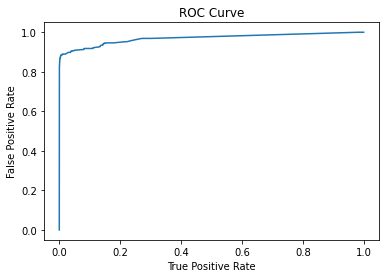

Training set ROC: 0.9693865746175484

In [0]:
trainingSummary = rfModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set ROC: ' + str(trainingSummary.areaUnderROC))

In [0]:
#Balancing the Dataset
from pyspark.sql.functions import when
ratio = 0.91
def weight_balance(labels):
    return when(labels == 1, ratio).otherwise(1*(1-ratio))
  
new_df = final_df.withColumn('weights', weight_balance(col('Class'))).drop('Class')

In [0]:
display(new_df)

V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 SAmount weights -1.3598071336738 -0.0727811733098497 2.53634673796914 1.37815522427443 -0.338320769942518 0.462387777762292 0.239598554061257 0.0986979012610507 0.363786969611213 0.0907941719789316 -0.551599533260813 -0.617800855762348 -0.991389847235408 -0.311169353699879 1.46817697209427 -0.470400525259478 0.207971241929242 0.0257905801985591 0.403992960255733 0.251412098239705 -0.018306777944153 0.277837575558899 -0.110473910188767 0.0669280749146731 0.128539358273528 -0.189114843888824 0.133558376740387 -0.0210530534538215 Map(vectorType -> dense, length -> 1, values -> List(0.5981926061623504)) 0.08999999999999997 1.19185711131486 0.26615071205963 0.16648011335321 0.448154078460911 0.0600176492822243 -0.0823608088155687 -0.0788029833323113 0.0851016549148104 -0.255425128109186 -0.166974414004614 1.61272666105479 1.06523531137287 0.48909501589608 -0.143772296441519 0.635558093258208 0.463917041022171 -0.114804663102346 -0.183361270123994 -0.145783041325259 -0.0690831352230203 -0.225775248033138 -0.638671952771851 0.101288021253234 -0.339846475529127 0.167170404418143 0.125894532368176 -0.00898309914322813 0.0147241691924927 Map(vectorType -> dense, length -> 1, values -> List(0.010754832980729332)) 0.08999999999999997 -1.35835406159823 -1.34016307473609 1.77320934263119 0.379779593034328 -0.503198133318193 1.80049938079263 0.791460956450422 0.247675786588991 -1.51465432260583 0.207642865216696 0.624501459424895 0.066083685268831 0.717292731410831 -0.165945922763554 2.34586494901581 -2.89008319444231 1.10996937869599 -0.121359313195888 -2.26185709530414 0.524979725224404 0.247998153469754 0.771679401917229 0.909412262347719 -0.689280956490685 -0.327641833735251 -0.139096571514147 -0.0553527940384261 -0.0597518405929204 Map(vectorType -> dense, length -> 1, values -> List(1.5139126604025908)) 0.08999999999999997 -0.966271711572087 -0.185226008082898 1.79299333957872 -0.863291275036453 -0.0103088796030823 1.24720316752486 0.23760893977178 0.377435874652262 -1.38702406270197 -0.0549519224713749 -0.226487263835401 0.178228225877303 0.507756869957169 -0.28792374549456 -0.631418117709045 -1.0596472454325 -0.684092786345479 1.96577500349538 -1.2326219700892 -0.208037781160366 -0.108300452035545 0.00527359678253453 -0.190320518742841 -1.17557533186321 0.647376034602038 -0.221928844458407 0.0627228487293033 0.0614576285006353 Map(vectorType -> dense, length -> 1, values -> List(0.4937627781115511)) 0.08999999999999997 -1.15823309349523 0.877736754848451 1.548717846511 0.403033933955121 -0.407193377311653 0.0959214624684256 0.592940745385545 -0.270532677192282 0.817739308235294 0.753074431976354 -0.822842877946363 0.53819555014995 1.3458515932154 -1.11966983471731 0.175121130008994 -0.451449182813529 -0.237033239362776 -0.0381947870352842 0.803486924960175 0.408542360392758 -0.00943069713232919 0.79827849458971 -0.137458079619063 0.141266983824769 -0.206009587619756 0.502292224181569 0.219422229513348 0.215153147499206 Map(vectorType -> dense, length -> 1, values -> List(0.2798255614577122)) 0.08999999999999997 -0.425965884412454 0.960523044882985 1.14110934232219 -0.168252079760302 0.42098688077219 -0.0297275516639742 0.476200948720027 0.260314333074874 -0.56867137571251 -0.371407196834471 1.34126198001957 0.359893837038039 -0.358090652573631 -0.137133700217612 0.517616806555742 0.401725895589603 -0.0581328233640131 0.0686531494425432 -0.0331937877876282 0.0849676720682049 -0.208253514656728 -0.559824796253248 -0.0263976679795373 -0.371426583174346 -0.232793816737034 0.105914779097957 0.253844224739337 0.0810802569229443 Map(vectorType -> dense, length -> 1, values -> List(0.014672950572221802)) 0.08999999999999997 1.22965763450793 0.141003507049326 0.0453707735899449 1.20261273673594 0.191880988597645 0.272708122899098 -0.00515900288250983 0.0812129398830894 0.464959994783886 -0.0992543211289237 -1.41690724314928 -0.15382582625365